In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import os
import pandas as pd

In [2]:
!which pip

/home/samir/miniconda3/envs/gendis/bin/pip


In [3]:
!pip freeze | grep GENDIS

GENDIS==1.0.13


In [4]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import SubgroupDistance

In except import


/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
error_df = pd.read_csv('data/Epilepsy2/Epilepsy2_processed_error.csv')

In [6]:
error_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,truth,clf_pred,clf_prob,error
0,0.442076,0.443537,0.445640,0.459069,0.463282,0.421495,0.410157,0.403137,0.411629,0.414410,...,0.560620,0.529869,0.495682,0.471787,0.462374,0.491186,1,0,0.000188,0.999812
1,0.493408,0.499578,0.505096,0.520393,0.532185,0.483627,0.462233,0.450196,0.455107,0.454522,...,0.517885,0.492915,0.461398,0.438610,0.431108,0.465812,1,1,0.995822,0.004178
2,0.472370,0.471698,0.470555,0.481921,0.485947,0.440526,0.425883,0.419869,0.431438,0.436127,...,0.545742,0.518477,0.487830,0.466040,0.459459,0.491720,1,1,0.941115,0.058885


In [26]:
X_train = error_df.drop(columns=['truth', 'clf_pred', 'clf_prob', 'error'])
y_train = error_df['error']

X_train = X_train.sample(n=400)
y_train = y_train[X_train.index]

In [27]:
y_train.describe()

count    400.000000
mean       0.124056
std        0.243403
min        0.000060
25%        0.007390
50%        0.017355
75%        0.076644
max        0.998707
Name: error, dtype: float64

In [28]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [76]:
DIST_THRESHOLD = 0.1

fitness_func = SubgroupDistance(
    distance_function=SubgroupDistance.wasserstein_distance, 
    shapelet_dist_threshold=DIST_THRESHOLD
)

args = {
    "fitness": fitness_func,
    "population_size": 30, 
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 5,
    "wait": 20, 
    "max_len": 35,
    "n_jobs": multiprocessing.cpu_count() - 1,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [77]:
gendis.__dict__

{'population_size': 30,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 15,
 'normed': False,
 '_min_length': 0,
 'max_len': 35,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'is_fitted': False,
 'fitness': <gendis.fitness.SubgroupDistance at 0x7fb19dae12e8>,
 'label_mapping': {},
 'shapelets': []}

In [78]:
%%time
gendis.fit(X_train, y_train.values)

it		avg		std		max		time
1		0.1168		0.07		0.210055	1.8137
2		0.1713		0.045		0.215795	2.4872
3		0.1915		0.03		0.224598	2.7971
4		0.1818		0.051		0.23611	3.1817
5		0.1952		0.046		0.23611	3.4364
6		0.2079		0.051		0.249808	2.5559
7		0.2169		0.035		0.249808	3.0968
8		0.2639		0.066		0.40005	2.3081
9		0.2787		0.097		0.40005	2.2125
10		0.3038		0.061		0.40005	1.8109
11		0.2854		0.136		0.40005	1.8527
12		0.308		0.112		0.40005	1.6986
13		0.35		0.085		0.40005	2.1748
14		0.3439		0.087		0.40005	1.1529
15		0.3859		0.047		0.40005	1.2392
16		0.3968		0.018		0.40005	0.9444
17		0.4001		0.0		0.40005	0.834
18		0.3903		0.053		0.40005	0.9293
19		0.3616		0.106		0.40005	1.0105
20		0.372		0.088		0.40005	1.2598
21		0.3841		0.073		0.40005	0.8305
22		0.3444		0.106		0.40005	1.2682
23		0.3648		0.093		0.40005	1.3426
24		0.3109		0.154		0.40005	1.3104
25		0.3518		0.119		0.40005	1.3303
26		0.3466		0.11		0.40005	1.2957
27		0.3811		0.058		0.40005	0.9627
CPU times: user 34.7 s, sys: 241 ms, total: 35 s
Wall time: 1min 17s


In [79]:
gendis.best

{'it': 8,
 'score': 0.40005014451217585,
 'info': {'dist': 0.4026208385995795,
  'subgroup_error_mean': 0.11301078488817831,
  'rest_error_mean': 0.5146377241572342,
  'subgroup_size': 389},
 'shapelets': [array([0.51844193, 0.53375405, 0.5387662 , 0.53681976, 0.53808945,
         0.5260134 , 0.52029767, 0.51252084, 0.50576259, 0.47833589])]}

In [80]:
gendis.top_10_best

[{'score': 0.40005014451217585,
  'info': {'dist': 0.4026208385995795,
   'subgroup_error_mean': 0.11301078488817831,
   'rest_error_mean': 0.5146377241572342,
   'subgroup_size': 389},
  'shapelets': [array([0.51844193, 0.53375405, 0.5387662 , 0.53681976, 0.53808945,
          0.5260134 , 0.52029767, 0.51252084, 0.50576259, 0.47833589])]},
 {'score': 0.40005014451217585,
  'info': {'dist': 0.4026208385995795,
   'subgroup_error_mean': 0.11301078488817831,
   'rest_error_mean': 0.5146377241572342,
   'subgroup_size': 389},
  'shapelets': [array([0.51844193, 0.53375405, 0.5387662 , 0.53681976, 0.53808945,
          0.5260134 , 0.52029767, 0.51252084, 0.50576259, 0.47833589])]},
 {'score': 0.40005014451217585,
  'info': {'dist': 0.4026208385995795,
   'subgroup_error_mean': 0.11301078488817831,
   'rest_error_mean': 0.5146377241572342,
   'subgroup_size': 389},
  'shapelets': [array([0.51844193, 0.53375405, 0.5387662 , 0.53681976, 0.53808945,
          0.5260134 , 0.52029767, 0.51252084,

In [81]:
help(gendis.transform)

Help on method transform in module gendis.genetic:

transform(X, shapelets=None) method of gendis.genetic.GeneticExtractor instance
    After fitting the Extractor, we can transform collections of 
    timeseries in matrices with distances to each of the shapelets in
    the evolved shapelet set.
    
    Parameters
    ----------
    X : array-like, shape = [n_ts, ]
        The training input timeseries. Each timeseries must be an array,
        but the lengths can be variable
    
    Returns
    -------
    D : array-like, shape = [n_ts, n_shaps]
        The matrix with distances
    L : array-like, shape = [n_ts, n_shaps]
        The matrix with localization of shapelets



In [82]:
D, L = gendis.transform(X=X_train)

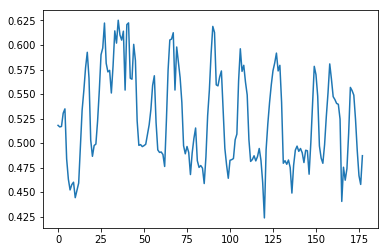

In [83]:
plt.plot(X_train.iloc[0].values)

In [84]:
import numpy as np
sg_filter = SubgroupDistance.filter_subgroup_shapelets(
    y_train, D, shapelet_dist_threshold=DIST_THRESHOLD, return_filter=True
)
[sg_indexes] = np.where(sg_filter)
[not_sg_indexes] = np.where(~sg_filter)

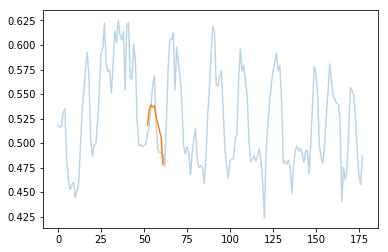

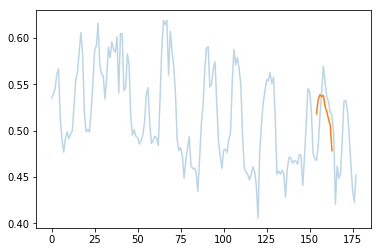

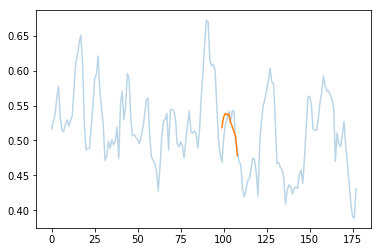

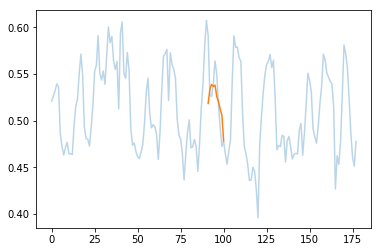

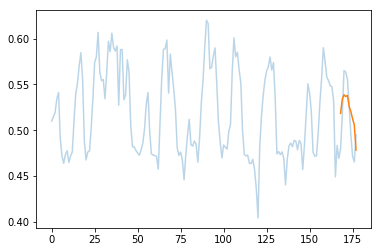

In [85]:
from math import ceil, floor


for series_idx in sg_indexes[:5]:
    series = X_train.iloc[series_idx].values
    plt.plot(series, alpha=0.3)

    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        #shap = gendis.best["shapelets"][shap_idx]
        k = loc * float(len(series) - len(shap)) 


        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))

        plt.plot(shap_idx, shap)
    
    plt.show()

In [86]:
import os
os.makedirs('./result', exist_ok=True)

In [87]:
y_train.index

Int64Index([ 902, 5817, 2984, 7782, 7819, 8019, 8756, 2340, 8925, 8571,
            ...
            9434, 5455, 2837, 1817, 9118, 7328, 7855, 6610,  640, 4376],
           dtype='int64', length=400)

IndexError: index 5 is out of bounds for axis 0 with size 5

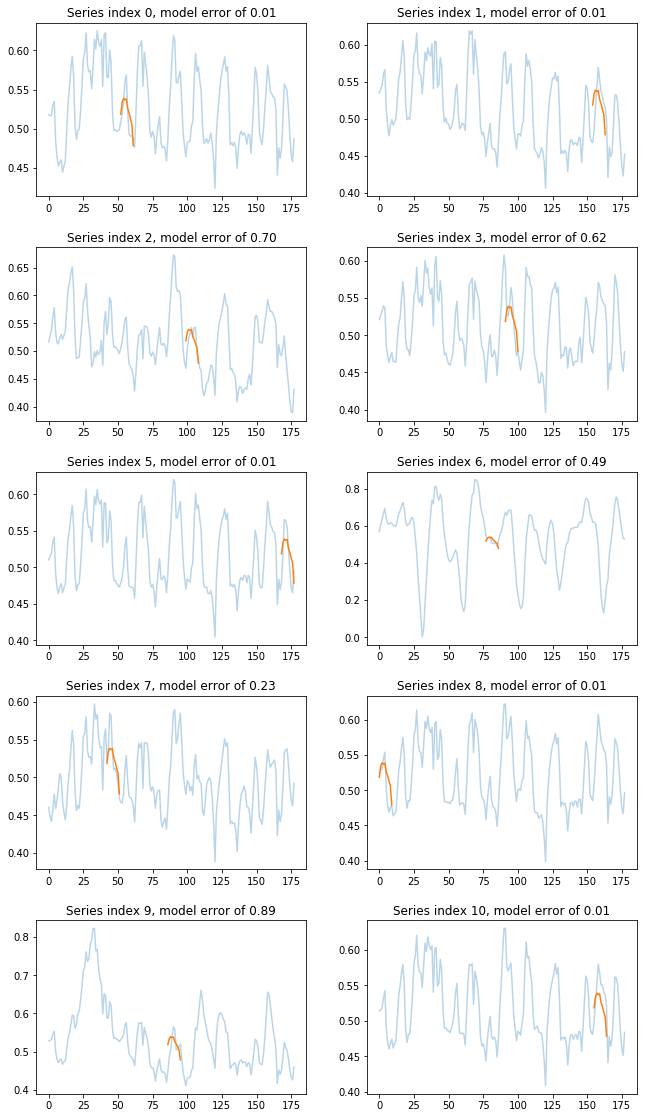

In [88]:
row_n, col_m = (5, 2)
adjust_w, adjust_h = (1, 0.5)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=3.0)


#for i, series_idx in enumerate(sg_indexes[0:row_n*col_m]):
for i, series_idx in enumerate(sg_indexes):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    
    series = X_train.iloc[series_idx].values
    ax.plot(series, alpha=0.3)
    model_error = y_train.iloc[series_idx]
    ax.title.set_text(f'Series index {series_idx}, model error of {model_error:.2f}')
    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        shap = gendis.best["shapelets"][shap_idx]

        k = loc * float(len(series) - len(shap)) 
        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))
        ax.plot(shap_idx, shap)

i+=1
while i < (row_n*col_m):
    row, col = i//col_m, i%col_m
    axs[row][col].remove()
    i+=1
        
sg_error = gendis.best['info']['subgroup_error_mean']
plt.savefig(f'results/shapelets_subgroup_error_{sg_error}.png',  bbox_inches='tight')

IndexError: index 5 is out of bounds for axis 0 with size 5

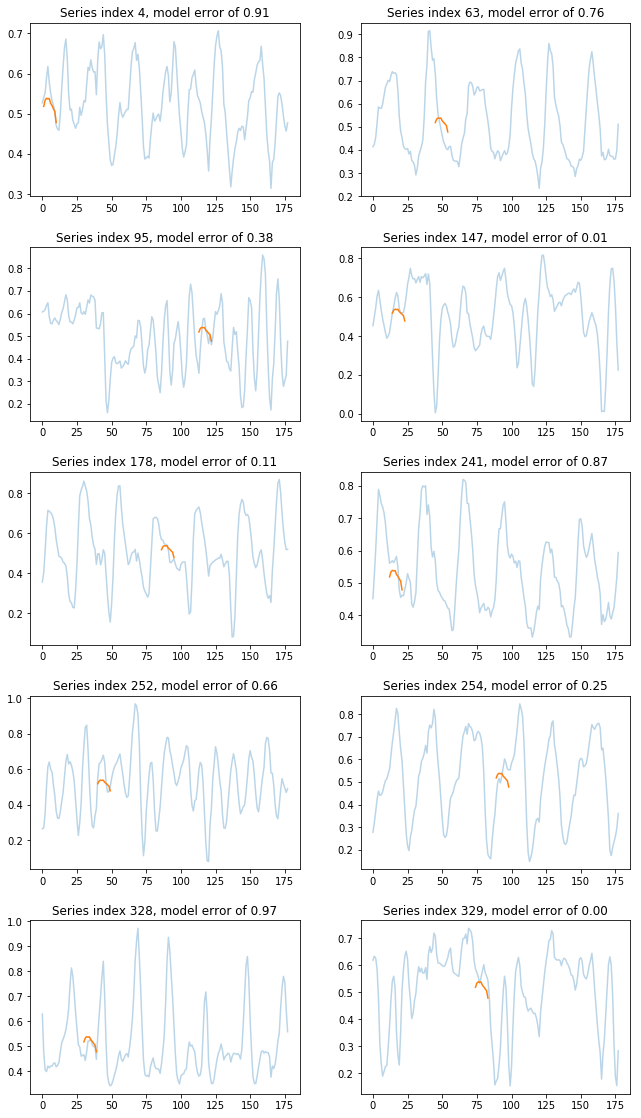

In [90]:
row_n, col_m = (5, 2)
adjust_w, adjust_h = (1, 0.5)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=3.0)


#for i, series_idx in enumerate(sg_indexes[0:row_n*col_m]):
for i, series_idx in enumerate(not_sg_indexes):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    
    series = X_train.iloc[series_idx].values
    ax.plot(series, alpha=0.3)
    model_error = y_train.iloc[series_idx]
    ax.title.set_text(f'Series index {series_idx}, model error of {model_error:.2f}')
    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        shap = gendis.best["shapelets"][shap_idx]
        #shap = gendis.best["shapelets"][shap_idx]
        k = loc * float(len(series) - len(shap)) 
        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))
        ax.plot(shap_idx, shap)

i+=1
while i < (row_n*col_m):
    row, col = i//col_m, i%col_m
    axs[row][col].remove()
    i+=1
        
plt.savefig(f'results/samples_notin_sg.png',  bbox_inches='tight')

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = f'./results/gunpoint/{ts}/'
os.makedirs(folder)
gendis.save(f'{folder}/gendis.pickle')